# Data Madness Notebook - "Go where you are treated best !" 

**The following notebook presents the work done by Group 2 for the Data Madness project which is part of the examination for the third year course KEN 3450 Data Analysis.** 

__IMPORTANT:__ In case you want to access the Numbeo API from this notebook, in order to allow ipynb to use large data streams, type the below instruction into your terminal. This does not work in case you are running jupyter from conda.

`jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10`

In [78]:
# Comment Hendrik : Say something about the permitted terms of distribution for this work.

In [79]:
# IMPORTS GALORE
import pandas as pd
import numpy as np
import scipy as sp

import statsmodels.formula.api as sm
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')   #seaborn-poster
plt.rcParams['figure.figsize'] = (11, 8)


#activate if need arises:
import warnings
warnings.filterwarnings('ignore')

## Part 1: EDA
### Import the  data from the two main sources:
+ [2017](https://www.kaggle.com/kaggle/kaggle-survey-2017), [2018](https://www.kaggle.com/kaggle/kaggle-survey-2018) and [2019](https://www.kaggle.com/c/kaggle-survey-2019/data) Kaggle Machine Learning & Data Science Survey **(1)**
+ 2017, 2018 and 2019 [Data Professional Salary Survey Results](https://www.brentozar.com/archive/2020/01/the-2020-data-professional-salary-survey-results-are-in/). The survey is conducted by Brent Ozar, a private database consultant. **(2)**

### 1.1.1 Import the ML and Data Science Survey Data

In [80]:
#local filepath, do not re-run cell or specify given file path on local machine 
file = '2017multipleChoiceResponses.csv'
# file = '/Users/HendrikS/Documents/GitHub/Data-Madness/2017multipleChoiceResponses.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

+ The data is in ascii encoding, thus the encoding that we use with the pandas `pandas.read_csv` function should be [ISO-8859-1](https://en.wikipedia.org/wiki/ISO/IEC_8859-1):

In [81]:
df_KGLresponse17 = pd.read_csv('2017multipleChoiceResponses.csv',encoding = "ISO-8859-1", engine ='python')
df_KGLresponse18 = pd.read_csv('2018multipleChoiceResponses.csv',encoding = "ISO-8859-1", engine ='python')
df_KGLresponse19 = pd.read_csv('2019multipleChoiceResponses.csv',encoding = "ISO-8859-1", engine ='python')

+ For the exploration and in order to spot similar variables between the different data frames, we want to see all variable Names:

In [82]:
pd.set_option('display.max_columns', None)

**Get an idea of the data of 2017:**

In [83]:
df_KGLresponse17.head(5)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

In [84]:
df_KGLresponse17.shape

(16716, 228)

+ Adding a `SurveyYear` column as the first column to all KGL dataframes:

In [85]:
# run this only once!
#2017
df_KGLresponse17['Survey Year'] = 2017
cols = df_KGLresponse17.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_KGLresponse17 = df_KGLresponse17[cols]
#2018
df_KGLresponse18['Survey Year'] = 2018
cols = df_KGLresponse18.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_KGLresponse18 = df_KGLresponse18[cols]
#2019
df_KGLresponse19['Survey Year'] = 2019
cols = df_KGLresponse19.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_KGLresponse19 = df_KGLresponse19[cols]


**Columns from KGL17 which are interesting for this analysis:**<br>

Columns that are interesting, but are difficult to work with  especially when considering the other data source (because e.g. the question goes into depth about ML) are noted in brackets. We have to keep in mind that the survey by Brent Ozar is answered by mainly database professionals which do not use, for instance, ML techniques often.

+ Column names are mostly self-explanatory. In case they are not, a description is added

+ `Survey Year`
+ `GenderSelect`
+ `Country` - The country you currently live in. (Note: As opposed to working in.)
+ `Age`  (not asked in other data source)
+ `EmploymentStatus`
+ `CurrentJobTitleSelect` (For job title there is also a FreeForm, i.e. the user can specify an own JobTitle which is not considered for this analysis). BUT: Free form responses are randomized within a column, so that reading across a single row does not give a single user's answers. Therefore, we disregard Free Form responses in this analysis.
+ `FormalEducation`
+ `MajorSelect` - Which best describes your undergraduate major? 
+ `Tenure` - How long have you been writing code to analyze data?
+ `EmployerSize` - How many employees work at your current or most recent company?
+ `CompensationAmount` - What is your current total yearly compensation (salary + bonus)? - Total Amount (e.g. 75,000)
+ `CompensationCurrency` - What is your current total yearly compensation (salary + bonus)? - Choose your currency
+ `JobSatisfaction` - On a scale from 0 (Highly Dissatisfied) - 10 (Highly Satisfied), how satisfied are you with your current job?


Possible additional variables:
+ (`MLSikllsSelect`) - In which areas of machine learning do you consider yourself competent?
+ (`MLTechniquesSelect`) - In which machine learning techniques do you consider yourself competent?
+ `ParentsEducation` - What's the highest level of education completed by either of your parents?
+ `EmployerIndustry` (no comparable variable in other data source, only `EmploymentSector`-public or private)

+ `JobFactorSalary` - How are you assessing potential job opportunities? - The compensation and benefits offered   (only asked to Learners)
+ `JobFactor_X_` - JobFactor questions only asked to respondents of type 'Learners'



**Get an idea of the data of 2018:**

In [86]:
df_KGLresponse18.head()  #header should be =1

,Survey Year,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_Part_13,Q13_Part_14,Q13_Part_15,Q13_OTHER_TEXT,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER_TEXT,Q15_Part_1,Q15_Part_2,Q15_Part_3,Q15_Part_4,Q15_Part_5,Q15_Part_6,Q15_Part_7,Q15_OTHER_TEXT,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_Part_18,Q16_OTHER_TEXT,Q17,Q17_OTHER_TEXT,Q18,Q18_OTHER_TEXT,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_Part_6,Q19_Part_7,Q19_Part_8,Q19_Part_9,Q19_Part_10,Q19_Part_11,Q19_Part_12,Q19_Part_13,Q19_Part_14,Q19_Part_15,Q19_Part_16,Q19_Part_17,Q19_Part_18,Q19_Part_19,Q19_OTHER_TEXT,Q20,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_Part_6,Q21_Part_7,Q21_Part_8,Q21_Part_9,Q21_Part_10,Q21_Part_11,Q21_Part_12,Q21_Part_13,Q21_OTHER_TEXT,Q22,Q22_OTHER_TEXT,Q23,Q24,Q25,Q26,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_Part_7,Q27_Part_8,Q27_Part_9,Q27_Part_10,Q27_Part_11,Q27_Part_12,Q27_Part_13,Q27_Part_14,Q27_Part_15,Q27_Part_16,Q27_Part_17,Q27_Part_18,Q27_Part_19,Q27_Part_20,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_Part_13,Q28_Part_14,Q28_Part_15,Q28_Part_16,Q28_Part_17,Q28_Part_18,Q28_Part_19,Q28_Part_20,Q28_Part_21,Q28_Part_22,Q28_Part_23,Q28_Part_24,Q28_Part_25,Q28_Part_26,Q28_Part_27,Q28_Part_28,Q28_Part_29,Q28_Part_30,Q28_Part_31,Q28_Part_32,Q28_Part_33,Q28_Part_34,Q28_Part_35,Q28_Part_36,Q28_Part_37,Q28_Part_38,Q28_Part_39,Q28_Part_40,Q28_Part_41,Q28_Part_42,Q28_Part_43,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_Part_13,Q29_Part_14,Q29_Part_15,Q29_Part_16,Q29_Part_17,Q29_Part_18,Q29_Part_19,Q29_Part_20,Q29_Part_21,Q29_Part_22,Q29_Part_23,Q29_Part_24,Q29_Part_25,Q29_Part_26,Q29_Part_27,Q29_Part_28,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_Part_13,Q30_Part_14,Q30_Part_15,Q30_Part_16,Q30_Part_17,Q30_Part_18,Q30_Part_19,Q30_Part_20,Q30_Part_21,Q30_Part_22,Q30_Part_23,Q30_Part_24,Q30_Part_25,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32,Q32_OTHER,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_OTHER_TEXT,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6,Q35_OTHER_TEXT,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT,Q37,Q37_OTHER_TEXT,Q38_Part_1,Q38_Part_2,Q38_Part_3,Q38_Part_4,Q38_Part_5,Q38_Part_6,Q38_Part_7,Q38_Part_8,Q38_Part_9,Q38_Part_10,Q38_Part_11,Q38_Part_12,Q38_Part_13,Q38_Part_14,Q38_Part_15,Q38_Part_16,Q38_Part_17,Q38_Part_18,Q38_Part_19,Q38_Part_20,Q38_Part_21,Q38_Part_22,Q38_OTHER_TEXT,Q39_Part_1,Q39_Part_2,Q40,Q41_Part_1,Q41_Part_2,Q41_Part_3,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_OTHER_TEXT,Q43,Q44_Part_1,Q44_Part_2,Q44_Part_3,Q44_Part_4,Q44_Part_5,Q44_Part_6,Q45_Part_1,Q45_

In [87]:
df_KGLresponse18.shape

(23860, 396)

+ For the 2018 and 2019 survey the `CompensationAmount` is asked for as follows: What is your current yearly compensation (approximate $USD)? So we do not have an additional currency column.

+ From 2017 to 2018 we are loosing following variables: `EmploymentStatus`,`EmployerSize`,`JobSatisfaction`

+ Renaming the relevant columns in the 2018 data:

In [88]:
df_KGLresponse18 = df_KGLresponse18.rename(columns={'Q1': 'GenderSelect', 'Q2': 'Age', 'Q3': 'Country', 'Q4': 'FormalEducation', 'Q6': 'CurrentJobTitleSelect', 'Q7' : 'EmployerIndustry', 'Q8' : 'Tenure', 'Q9' : 'SalaryUSD'})                              


**Get an idea of the data of 2019:**

In [89]:
df_KGLresponse19.head(2)  #header should be =1

,Survey Year,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,2019,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media 

In [90]:
df_KGLresponse19.shape

(19718, 247)

+ `EmployerSize` is again a variable in the 2019 data, instead `EmployerIndustry` is missing.

Renaming the relevant columns in the 2019 data:

In [91]:
df_KGLresponse19 = df_KGLresponse19.rename(columns={'Q1': 'Age', 'Q2': 'GenderSelect', 'Q3': 'Country', 'Q4': 'FormalEducation', 'Q5': 'CurrentJobTitleSelect', 'Q6' : 'EmployerSize', 'Q10' : 'SalaryUSD', 'Q15' : 'Tenure'}) 


For 2018 and 2019 the order of questions has changed quite a bit. Even from 2018 to 2019 there are quite some changes. in Section 1.1.3 we extract the relevant columns from all three data frames.

### 1.1.2 Import the Professional Salary Survey Data

In [92]:
df_OZRresponse = pd.read_excel('Data_Professional_Salary_Survey_Responses.xlsx', header = 3)

In [93]:
df_OZRresponse.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,DatabaseServers,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),NaN,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,No,2,Not Asked,None,Not Asked,500,Associates (2 years),No,"No, I never have",40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,No,10,Not Asked,None,Not Asked,30,Bachelors (4 years),Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


Observation: Some questions are only asked up from more recent years. Most importantly, Gender was only asked up from 2018. 

**Columns which interesting for this analysis:**
+ `Survey Year`
+ `SalaryUSD`
+ `Country`  (We assume here (and it also follows from the [website](https://www.brentozar.com/archive/2020/01/the-2020-data-professional-salary-survey-results-are-in/) of the survey "[...] of you in 63 countries answered"), that this is the country of residence of the respondent.  Since this is the case for both data sources, we assume from now on that the country variable encodes the country of residence and that it is the same as the country where one is employed/works (which might not be true in all cases).
+ `EmploymentStatus`
+ `JobTitle`
+ `YearsWithThisTypeOfJob`
+ `CompanyEmployeesOverall` (was only asked up from 2019)
+ `Education`
+ `HoursWorkedPerWeek` (not a variable in other data source)
+ `PopulationOfLargestCityWithin20Miles` (was only asked up from 2019 and no comparable variable in other data source)
+ `LookingForAnotherJob` (somewhat comparable with `JobSatisfaction` from KGLE data)
+ `Gender` (was only asked up from 2018)



### 1.1.3 Extracting the relevant data

Let's extract the variables that are relevant for the data analysis from the first source, the Kaggle ML and Data Science Surveys from the years 2017, 2018 and 2019 first.The questions/variables have changed in content as well as location from year to year. We thus have to manually gather the variables from each dataframe that we are interested in.

In [94]:
# conflicts: age not in OZR Data, still need to deal with different currencies, deal with EmployerIndustry

relevantVars17 = ['Survey Year',
                  'CompensationAmount',
                  'CompensationCurrency',
                  'Country',
                  'EmploymentStatus',
                  'CurrentJobTitleSelect',
                  'Tenure',
                  'EmployerSize',
                  'FormalEducation',
                  'JobSatisfaction',
                  'EmployerIndustry',
                  'GenderSelect',
                  'Age']    #leave MajorSelect out for now (conflict with other dataset)

df_KGL17_da = df_KGLresponse17[relevantVars17]
df_KGL17_da.shape

(16716, 13)

In [95]:
relevantVars18 = ['Survey Year',
                  'SalaryUSD',
                  'Country',
                  'CurrentJobTitleSelect',
                  'Tenure',
                  'FormalEducation',
                  'EmployerIndustry',
                  'GenderSelect',
                  'Age'] 

df_KGL18_da = df_KGLresponse18[relevantVars18]
df_KGL18_da.shape

(23860, 9)

In [96]:
df_KGLresponse19 = df_KGLresponse19.rename(columns={'Q1': 'Age', 'Q2': 'GenderSelect', 'Q3': 'Country', 'Q4': 'FormalEducation', 'Q5': 'CurrentJobTitleSelect', 'Q6' : 'EmployerSize', 'Q10' : 'SalaryUSD', 'Q15' : 'Tenure'})
relevantVars19 = ['Survey Year',
                  'SalaryUSD',
                  'Country',
                  'CurrentJobTitleSelect',
                  'Tenure',
                  'FormalEducation',
                  'EmployerSize',
                  'GenderSelect',
                  'Age'] 

df_KGL19_da = df_KGLresponse19[relevantVars19]
df_KGL19_da.shape

(19718, 9)

**Assumptions:**
+ `Tenure`(How long have you been writing code to analyze data?) and `YearsWithinThisTypeOfJob` are comparable variables. Although they might not capture the exact same meaning, they still have large contextual intersection. In reality, we would perhaps expect `Tenure` to be slightly longer than `YearsWithinThisTypeOfJob` for a given person. However, in most cases `YearsWithinThisTypeOfJob` cannot be shorter than Tenure, i.e. one needs to be able to write code to work as a (DB) engineer in the Information Sector.

In [97]:
relevantVarsOZR = ['Survey Year',
                  'SalaryUSD',
                  'Country',
                  'EmploymentStatus',
                  'JobTitle',
                  'YearsWithThisTypeOfJob',
                  'CompanyEmployeesOverall',
                  'Education',
                  'LookingForAnotherJob',
                  'Gender']  # leave HoursWorkedPerWeek,PopulationOfLargestCityWithin20Miles out for now (conflict with other dataset)
df_OZRresponse_da = df_OZRresponse[relevantVarsOZR]

In [98]:
df_OZRresponse_da.shape

(6893, 10)

### 1.1.4 Initial Cleaning of the Data, Making the Data Compatible

+ Compute the salary in USD for the 2017 respondents. In order to do so, we must draw from the conversion rates for some point in time in 2017. According to the website, the survey was live from August 7th to August 25th. Therefore, lets take the conversion rates from end of August 2017.

In [99]:
df_KGL17_da.loc[:,'CompensationAmount']=df_KGL17_da.loc[:,'CompensationAmount'].str.replace('-','')
df_KGL17_da.loc[:,'CompensationAmount']=df_KGL17_da.loc[:,'CompensationAmount'].str.replace(',','')
df_KGL17_da.loc[:,'CompensationAmount']=df_KGL17_da.loc[:,'CompensationAmount'].str.replace("'",'')

Conv_rates = pd.read_csv('conversionRates17.csv')
Conv_rates.drop('Unnamed: 0',axis=1,inplace=True)
#run only once!
df_KGL17_da = df_KGL17_da.merge(Conv_rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
df_KGL17_da['Salary'] = pd.to_numeric(df_KGL17_da['CompensationAmount'])*df_KGL17_da['exchangeRate']

+ Rearrange `SalaryUSD` column to match other dataframes:

In [100]:
colNew = df_KGL17_da.loc[:,'Salary']
df_KGL17_da.insert(loc=2, column='SalaryUSD', value=np.round(colNew,0))
df_KGL17_da = df_KGL17_da.drop(columns=['CompensationAmount','CompensationCurrency','originCountry', 'exchangeRate','Salary'])

+ In the 2018 and 2019 data `SalaryUSD` is only specified on an interval. We need one fixed value, hence we have to deal with this. For the purpose of this analysis, we exclude the highrollers with more than $500,000$ USD annual salary (we loose only 63 entries from KGL18). - Only run this section once!

In [101]:
print(len(df_KGL18_da[df_KGL18_da.loc[:,'SalaryUSD']=='500,000+']))       
df_KGL18_da = df_KGL18_da[df_KGL18_da.loc[:,'SalaryUSD'].notna()]
df_KGL18_da = df_KGL18_da[~df_KGL18_da.loc[:,'SalaryUSD'].str.startswith('I')]
df_KGL18_da = df_KGL18_da[~df_KGL18_da['SalaryUSD'].str.contains('500,000+')] 
df_KGL18_da.loc[:,'SalaryUSD'] =df_KGL18_da.loc[:,'SalaryUSD'] .astype(str)
df_KGL18_da = df_KGL18_da.drop(0).reset_index(drop=True)

63


In [102]:
df_KGL18_da.loc[:,'lowerBound'] = df_KGL18_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[0] if x[0].isdigit() else x)
df_KGL18_da.loc[:,'upperBound'] = df_KGL18_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[2] if x[0].isdigit() else x)

                                                                                                                     
df_KGL18_da.loc[:,'upperBound']=df_KGL18_da.loc[:,'upperBound'].str.replace('-','')
df_KGL18_da.loc[:,'upperBound']=df_KGL18_da.loc[:,'upperBound'].str.replace(',','')
df_KGL18_da.loc[:,'upperBound']=df_KGL18_da.loc[:,'upperBound'].str.replace("'",'')

df_KGL18_da = df_KGL18_da.astype({'lowerBound': 'int64','upperBound' : 'int64'})
df_KGL18_da.loc[:,'lowerBound'] = df_KGL18_da.loc[:,'lowerBound'].apply(lambda x: x * 1000)
df_KGL18_da.loc[:,'SalaryUSD'] = (df_KGL18_da.loc[:,'lowerBound']+df_KGL18_da.loc[:,'upperBound'])/2
df_KGL18_da = df_KGL18_da.astype({'SalaryUSD': 'int64'})
df_KGL18_da = df_KGL18_da.drop(columns=['lowerBound','upperBound'])
df_KGL18_da 

,Survey Year,SalaryUSD,Country,CurrentJobTitleSelect,Tenure,FormalEducation,EmployerIndustry,GenderSelect,Age
0,2018,15000,Indonesia,Other,5-10,Bachelorâs degree,Manufacturing/Fabrication,Male,30-34
1,2018,5000,United States of America,Data Scientist,0-1,Masterâs degree,I am a student,Female,30-34
2,2018,5000,India,Data Analyst,0-1,Masterâs degree,I am a student,Male,22-24
3,2018,15000,Chile,Other,10-15,Doctoral degree,Academics/Education,Male,35-39
4,2018,5000,India,Other,0-1,Masterâs degree,Other,Male,18-21
...,...,...,...,...,...,...,...,...,...
15338,2018,95000,Netherlands,Software Engineer,10-15,Masterâs degree,Computers/Technology,Male,30-34
15339,2018,5000,Romania,Student,0-1,Masterâs degree,I am a student,Male,22-24
15340,2018,15000,Turkey,Research Assistant,5-10,Doctoral degree,Academics/Education,Male,30-34
15341,2018,275000,France,Chief Officer,5-10,Doctoral degree,Computers/Technology,Male,45-49


In [103]:
df_KGL19_da = df_KGL19_da[df_KGL19_da.loc[:,'SalaryUSD'].notna()]
df_KGL19_da.loc[:,'SalaryUSD'] = df_KGL19_da.loc[:,'SalaryUSD'].astype(str)
df_KGL19_da = df_KGL19_da.drop(0).reset_index(drop=True)

In [104]:
df_KGL19_da.loc[:,'lowerBound'] = df_KGL19_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[0] if x[0].isdigit() else ('500' if x[0] == '$' else x))
df_KGL19_da.loc[:,'upperBound'] = df_KGL19_da.loc[:,'SalaryUSD'].apply(lambda x: x.partition('-')[2] if x[0].isdigit() else ('500' if x[0] == '$' else x))

df_KGL19_da.loc[:,'upperBound']=df_KGL19_da.loc[:,'upperBound'].str.replace('-','')
df_KGL19_da.loc[:,'upperBound']=df_KGL19_da.loc[:,'upperBound'].str.replace(',','')
df_KGL19_da.loc[:,'upperBound']=df_KGL19_da.loc[:,'upperBound'].str.replace("'",'')
df_KGL19_da.loc[:,'lowerBound']=df_KGL19_da.loc[:,'lowerBound'].str.replace('-','')
df_KGL19_da.loc[:,'lowerBound']=df_KGL19_da.loc[:,'lowerBound'].str.replace(',','')
df_KGL19_da.loc[:,'lowerBound']=df_KGL19_da.loc[:,'lowerBound'].str.replace("'",'')

df_KGL19_da = df_KGL19_da[~df_KGL19_da['upperBound'].str.startswith('>')]
df_KGL19_da = df_KGL19_da.astype({'lowerBound': 'int64','upperBound' : 'int64'})

df_KGL19_da.loc[:,'SalaryUSD'] = np.round((df_KGL19_da.loc[:,'lowerBound']+df_KGL19_da.loc[:,'upperBound'])/2,0)
df_KGL19_da = df_KGL19_da.astype({'SalaryUSD': 'int64'})
df_KGL19_da = df_KGL19_da.drop(columns=['lowerBound','upperBound'])
df_KGL19_da 

,Survey Year,SalaryUSD,Country,CurrentJobTitleSelect,Tenure,FormalEducation,EmployerSize,GenderSelect,Age
0,2019,35000,France,Software Engineer,1-2 years,Masterâs degree,"1000-9,999 employees",Male,22-24
1,2019,6250,India,Software Engineer,I have never written code,Professional degree,"> 10,000 employees",Male,40-44
2,2019,275000,Australia,Other,1-2 years,Masterâs degree,"> 10,000 employees",Male,40-44
3,2019,4500,India,Other,< 1 years,Bachelorâs degree,0-49 employees,Male,22-24
4,2019,65000,France,Data Scientist,20+ years,Masterâs degree,0-49 employees,Male,50-54
...,...,...,...,...,...,...,...,...,...
12492,2019,8750,India,Data Scientist,NaN,Bachelorâs degree,50-249 employees,Male,22-24
12493,2019,1500,Austria,Data Scientist,NaN,No formal education past high school,250-999 employees,Prefer not to say,25-29
12494,2019,500,India,Other,1-2 years,Bachelorâs degree,250-999 employees,Male,18-21
12495,2019,1500,India,Statistician,NaN,Masterâs degree,50-249 employees,Male,25-29


**Observation:** When only considering data without NaN for `SalaryUSD` in KGL18 and KGL19, the amount of data drops from $23000$ to $15000$ for KGL18 and $20000$ to $12000$ for KGL19. In KGL17, where respondents were asked for a specific salary figure, as opposed to a bracket, the amount of people who answer that question drops drastically from $17000$ to $4000$.

In [105]:
df_KGL17_Salary = df_KGL17_da[df_KGL17_da.loc[:,'SalaryUSD'].notna()]
df_KGL17_Salary.shape
df_KGL17_Salary = df_KGL17_Salary.astype({'SalaryUSD': 'int64'})
df_KGL17_Salary

,Survey Year,SalaryUSD,Country,EmploymentStatus,CurrentJobTitleSelect,Tenure,EmployerSize,FormalEducation,JobSatisfaction,EmployerIndustry,GenderSelect,Age
3,2017,250000,United States,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,More than 10 years,NaN,Master's degree,10 - Highly Satisfied,Mix of fields,Male,56.0
8,2017,64185,Australia,Employed full-time,Business Analyst,3 to 5 years,20 to 99 employees,Bachelor's degree,7,Non-profit,Female,43.0
9,2017,20882,Russia,Employed full-time,Software Developer/Software Engineer,1 to 2 years,20 to 99 employees,Bachelor's degree,7,Internet-based,Male,33.0
11,2017,1484,India,Employed full-time,Data Scientist,3 to 5 years,100 to 499 employees,Bachelor's degree,7,Mix of fields,Male,27.0
14,2017,36634,Taiwan,Employed full-time,Software Developer/Software Engineer,1 to 2 years,Fewer than 10 employees,Master's degree,5,Financial,Male,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,2017,50000,Other,Employed full-time,DBA/Database Engineer,1 to 2 years,20 to 99 employees,Bachelor's degree,4,Other,Male,56.0
16517,2017,100449,Germany,Employed full-time,Software Developer/Software Engineer,6 to 10 years,100 to 499 employees,Bachelor's degree,6,Telecommunications,Male,34.0
16525,2017,200000,United States,Employed full-time,Data Scientist,More than 10 years,"10,000 or more employees",Doctoral degree,7,Technology,Male,50.0
16577,2017,89687,Norway,Employed full-time,Data Analyst,3 to 5 years,"10,000 or more employees",Master's degree,8,Financial,Male,32.0


### 1.1.5 Bringing the data from different sources together

+ Arrange the KGL data in one large df, sorted by year
+ Construct artificial categorical variable `DataSet` to keep track from which dataset the data originates from

In [106]:
df_KGL17Ap = df_KGL17_Salary[['Survey Year','SalaryUSD','Country','CurrentJobTitleSelect','Tenure','FormalEducation','GenderSelect','Age']] 
df_KGL18Ap = df_KGL18_da[['Survey Year','SalaryUSD','Country','CurrentJobTitleSelect','Tenure','FormalEducation','GenderSelect','Age']]
df_KGL19Ap = df_KGL19_da[['Survey Year','SalaryUSD','Country','CurrentJobTitleSelect','Tenure','FormalEducation','GenderSelect','Age']]

df_KGL = df_KGL17Ap.append(df_KGL18Ap.append(df_KGL19Ap, ignore_index=True),ignore_index=True)
df_KGL['DataSet'] = 0 
df_KGL = df_KGL.rename(columns={'CurrentJobTitleSelect': 'JobTitle','FormalEducation' : 'Education', 'GenderSelect': 'Gender' })
df_KGL

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet
0,2017,250000,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56.0,0
1,2017,64185,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43.0,0
2,2017,20882,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33.0,0
3,2017,1484,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27.0,0
4,2017,36634,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26.0,0
...,...,...,...,...,...,...,...,...,...
32125,2019,8750,India,Data Scientist,NaN,Bachelorâs degree,Male,22-24,0
32126,2019,1500,Austria,Data Scientist,NaN,No formal education past high school,Prefer not to say,25-29,0
32127,2019,500,India,Other,1-2 years,Bachelorâs degree,Male,18-21,0
32128,2019,1500,India,Statistician,NaN,Masterâs degree,Male,25-29,0


In [107]:
df_OZR = df_OZRresponse_da[['Survey Year','SalaryUSD','Country','JobTitle','YearsWithThisTypeOfJob','Education','Gender']] 
df_OZR['DataSet'] = 1 
df_OZR = df_OZR.rename(columns={'YearsWithThisTypeOfJob': 'Tenure'})
df_OZR


,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,DataSet
0,2017,200000,United States,DBA,5,Masters,Not Asked,1
1,2017,61515,United Kingdom,DBA,3,None (no degree completed),Not Asked,1
2,2017,95000,Germany,Other,25,Masters,Not Asked,1
3,2017,56000,United Kingdom,DBA,2,Associates (2 years),Not Asked,1
4,2017,35000,France,DBA,10,Bachelors (4 years),Not Asked,1
...,...,...,...,...,...,...,...,...
6888,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,1
6889,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,1
6890,2019,40000,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,1
6891,2019,130000,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,1


In [108]:
df_income = df_KGL.append(df_OZR,ignore_index = True)

df_income = df_income[['Survey Year','SalaryUSD','Country','JobTitle','Tenure','Education','Gender','Age','DataSet']]
df_income

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet
0,2017,250000,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56.0,0
1,2017,64185,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43.0,0
2,2017,20882,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33.0,0
3,2017,1484,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27.0,0
4,2017,36634,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26.0,0
...,...,...,...,...,...,...,...,...,...
39018,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39019,2019,32000,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39020,2019,40000,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1
39021,2019,130000,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1


**Observation:** We lose quite some variables on the way. If we want to take the intersection between the different dataset, then we are left with the following variables from which `Age` is not even contained in the Brent Ozar Data Set:
+ `Survey Year`
+ `SalaryUSD`
+ `Country`
+ `JobTitle`
+ `Tenure`
+ `Education`
+ `Gender`
+ (`Age`)

### 1.1.6 fix the datatype of the salary and country columns

In [109]:
df_income.SalaryUSD = df_income.SalaryUSD.astype(str)
df_income.SalaryUSD = df_income.SalaryUSD.str.replace(' ', '', regex=True)
df_income.SalaryUSD = df_income.SalaryUSD.str.replace(',', '', regex=True).astype(float)
df_income.Country = df_income.Country.astype(str)

In [110]:
df_income.describe()

,Survey Year,SalaryUSD,DataSet
count,39023.000000,3.902300e+04,39023.000000
mean,2018.154396,7.896251e+05,0.176639
std,0.709382,1.432508e+08,0.381368
min,2017.000000,0.000000e+00,0.000000
25%,2018.000000,1.250000e+04,0.000000
50%,2018.000000,4.500000e+04,0.000000
75%,2019.000000,9.000000e+04,0.000000
max,2019.000000,2.829740e+10,1.000000


In [119]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39023 entries, 0 to 39022
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survey Year  39023 non-null  int64  
 1   SalaryUSD    39023 non-null  float64
 2   Country      39023 non-null  object 
 3   JobTitle     39022 non-null  object 
 4   Tenure       37879 non-null  object 
 5   Education    39022 non-null  object 
 6   Gender       39018 non-null  object 
 7   Age          32103 non-null  object 
 8   DataSet      39023 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.7+ MB


In [112]:
df_income

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet
0,2017,250000.0,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56.0,0
1,2017,64185.0,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43.0,0
2,2017,20882.0,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33.0,0
3,2017,1484.0,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27.0,0
4,2017,36634.0,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26.0,0
...,...,...,...,...,...,...,...,...,...
39018,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39019,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1
39020,2019,40000.0,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1
39021,2019,130000.0,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1


### 1.1.7 clean the (salary) data

In [116]:
# pd.set_option('display.max_rows', None)
print(df_income.sort_values("SalaryUSD", ascending=True).head(50))
# pd.set_option('display.max_rows', 10)

      Survey Year  SalaryUSD        Country  \
581          2017        0.0    Netherlands   
2864         2017        0.0      Hong Kong   
1522         2017        0.0  United States   
401          2017        0.0   South Africa   
386          2017        0.0      Hong Kong   
...           ...        ...            ...   
4062         2017        0.0          Spain   
2612         2017        0.0          India   
3691         2017        0.0           Iran   
799          2017        1.0    South Korea   
3447         2017        1.0          India   

                                  JobTitle              Tenure  \
581                             Researcher        1 to 2 years   
2864  Software Developer/Software Engineer  More than 10 years   
1522                          Data Analyst        1 to 2 years   
401                           Data Analyst        3 to 5 years   
386                             Programmer    Less than a year   
...                                    

In [118]:
pd.set_option('display.max_rows', None)
print(df_income.sort_values("SalaryUSD", ascending=False).head(50))
pd.set_option('display.max_rows', 10)

       Survey Year     SalaryUSD  \
2049          2017  2.829740e+10   
216           2017  2.090000e+08   
1055          2017  9.999999e+06   
4338          2017  4.498900e+06   
3828          2017  2.500000e+06   
1658          2017  2.395469e+06   
3897          2017  2.000000e+06   
35215         2018  1.450000e+06   
33144         2017  1.450000e+06   
36543         2018  1.375000e+06   
3686          2017  1.059875e+06   
444           2017  1.000000e+06   
3608          2017  1.000000e+06   
36863         2018  1.000000e+06   
34283         2017  1.000000e+06   
2863          2017  1.000000e+06   
268           2017  1.000000e+06   
37245         2018  9.600000e+05   
35926         2018  8.320310e+05   
37556         2018  8.000000e+05   
34003         2017  7.850000e+05   
38283         2019  7.500000e+05   
36979         2018  7.050000e+05   
3294          2017  6.990900e+05   
37347         2018  6.840000e+05   
35905         2018  6.500000e+05   
37145         2018  6.288570

**Observation:** A wide range of salaries is possible, but something equal to the profits of a top 10 most profitable company is an error.
Because countries differ a lot, we consider the data on a per country basis.
If someone earns less than specified fraction of the countries median datascientist salary from the original set, we can ignore this entry as this is either a mistake by reporting monthly or a student or perhaps a part-time worker.
Defining an upper bound is more difficult, but specified multiple the median of a country leaves enough room for countries with strong internal differences.

In [130]:
min_multiple = .25
max_multiple = 25

In [114]:
median_salary_by_country = df_income.groupby("Country")["SalaryUSD"].median()
# pd.set_option('display.max_rows', None)
print(median_salary_by_country)
# pd.set_option('display.max_rows', 10)

Country
Albania      12000.0
Algeria       1500.0
Argentina    15000.0
Australia    85000.0
Austria      55000.0
              ...   
Uruguay      17333.0
Venezuela     5000.0
Viet Nam      5000.0
Vietnam      12168.0
nan          32825.0
Name: SalaryUSD, Length: 106, dtype: float64


In [124]:
df_income['countryMedianSalary'] = df_income.apply(lambda row: median_salary_by_country.loc[row.Country], axis=1)


In [125]:
df_income

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet,countryMedianSalary
0,2017,250000.0,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56.0,0,103000.0
1,2017,64185.0,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43.0,0,85000.0
2,2017,20882.0,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33.0,0,15000.0
3,2017,1484.0,India,Data Scientist,3 to 5 years,Bachelor's degree,Male,27.0,0,7380.5
4,2017,36634.0,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26.0,0,27500.0
...,...,...,...,...,...,...,...,...,...,...
39018,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39019,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39020,2019,40000.0,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1,22500.0
39021,2019,130000.0,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1,103000.0


+ Define the filters as discussed

In [131]:
salary_min = df_income['SalaryUSD'] > df_income['countryMedianSalary'] * min_multiple
salary_max = df_income['SalaryUSD'] < df_income['countryMedianSalary'] * max_multiple
df_income_filtered = df_income[salary_min & salary_max]

In [127]:
pd.set_option('display.max_rows', 20)
df_income_filtered

,Survey Year,SalaryUSD,Country,JobTitle,Tenure,Education,Gender,Age,DataSet,countryMedianSalary
0,2017,250000.0,United States,Operations Research Practitioner,More than 10 years,Master's degree,Male,56.0,0,103000.0
1,2017,64185.0,Australia,Business Analyst,3 to 5 years,Bachelor's degree,Female,43.0,0,85000.0
2,2017,20882.0,Russia,Software Developer/Software Engineer,1 to 2 years,Bachelor's degree,Male,33.0,0,15000.0
4,2017,36634.0,Taiwan,Software Developer/Software Engineer,1 to 2 years,Master's degree,Male,26.0,0,27500.0
6,2017,100000.0,United States,Scientist/Researcher,Less than a year,Doctoral degree,Male,33.0,0,103000.0
...,...,...,...,...,...,...,...,...,...,...
39018,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39019,2019,32000.0,Hungary,DBA (General - splits time evenly between writ...,3,Bachelors (4 years),Male,NaN,1,22500.0
39020,2019,40000.0,Portugal,"Developer: App code (C#, JS, etc)",19,Bachelors (4 years),Male,NaN,1,22500.0
39021,2019,130000.0,United States,DBA (General - splits time evenly between writ...,17,Bachelors (4 years),Female,NaN,1,103000.0


In [132]:
print(f"after filtering we lost {df_income['SalaryUSD'].count() - df_income_filtered['SalaryUSD'].count()} rows")

after filtering we lost 4517 rows


+ Getting rid of countries with fewer than 20 responses

In [144]:
resp_counts = df_income_filtered.groupby("Country")["SalaryUSD"].count()

In [145]:
df_income_filtered['countryResponseCount'] = df_income_filtered.apply(lambda row: resp_counts.loc[row.Country], axis=1)

In [159]:
df_income_filtered = df_income_filtered[df_income_filtered['countryResponseCount'] > 20]
df_income_filtered = df_income_filtered[df_income_filtered['Country'] != "I do not wish to disclose my location"]


['United States' 'Australia' 'Russia' 'Taiwan' 'Colombia' 'Germany'
 'Poland' 'United Kingdom' 'Sweden' 'Portugal' 'Mexico' 'India' 'France'
 'Spain' 'Hungary' 'Brazil' 'Other' 'Canada' 'New Zealand' 'Netherlands'
 'Belarus' 'Czech Republic' 'South Africa' 'South Korea' 'Italy' 'Ukraine'
 'Ireland' "People 's Republic of China" 'Japan' 'Malaysia' 'Switzerland'
 'Argentina' 'Indonesia' 'Philippines' 'Singapore' 'Pakistan' 'Nigeria'
 'Turkey' 'Norway' 'Israel' 'Finland' 'Greece' 'Belgium' 'Denmark' 'Egypt'
 'Kenya' 'Romania' 'Chile' 'United States of America'
 'Iran, Islamic Republic of...' 'China' 'Hong Kong (S.A.R.)' 'Thailand'
 'Morocco' 'Tunisia' 'Bangladesh' 'Austria' 'Viet Nam' 'Peru'
 'Republic of Korea' 'Algeria' 'Saudi Arabia']


+ make country naming consistent

In [160]:
df_income_filtered.loc[(df_income_filtered.Country == 'United Kingdom of Great Britain and Northern Ireland'),'Country']='United Kingdom'
df_income_filtered.loc[(df_income_filtered.Country == 'United States of America'),'Country']='United States'
print(df_income_filtered['Country'].unique())

['United States' 'Australia' 'Russia' 'Taiwan' 'Colombia' 'Germany'
 'Poland' 'United Kingdom' 'Sweden' 'Portugal' 'Mexico' 'India' 'France'
 'Spain' 'Hungary' 'Brazil' 'Other' 'Canada' 'New Zealand' 'Netherlands'
 'Belarus' 'Czech Republic' 'South Africa' 'South Korea' 'Italy' 'Ukraine'
 'Ireland' "People 's Republic of China" 'Japan' 'Malaysia' 'Switzerland'
 'Argentina' 'Indonesia' 'Philippines' 'Singapore' 'Pakistan' 'Nigeria'
 'Turkey' 'Norway' 'Israel' 'Finland' 'Greece' 'Belgium' 'Denmark' 'Egypt'
 'Kenya' 'Romania' 'Chile' 'Iran, Islamic Republic of...' 'China'
 'Hong Kong (S.A.R.)' 'Thailand' 'Morocco' 'Tunisia' 'Bangladesh'
 'Austria' 'Viet Nam' 'Peru' 'Republic of Korea' 'Algeria' 'Saudi Arabia']


<AxesSubplot:title={'center':'SalaryUSD'}, xlabel='[Country]'>

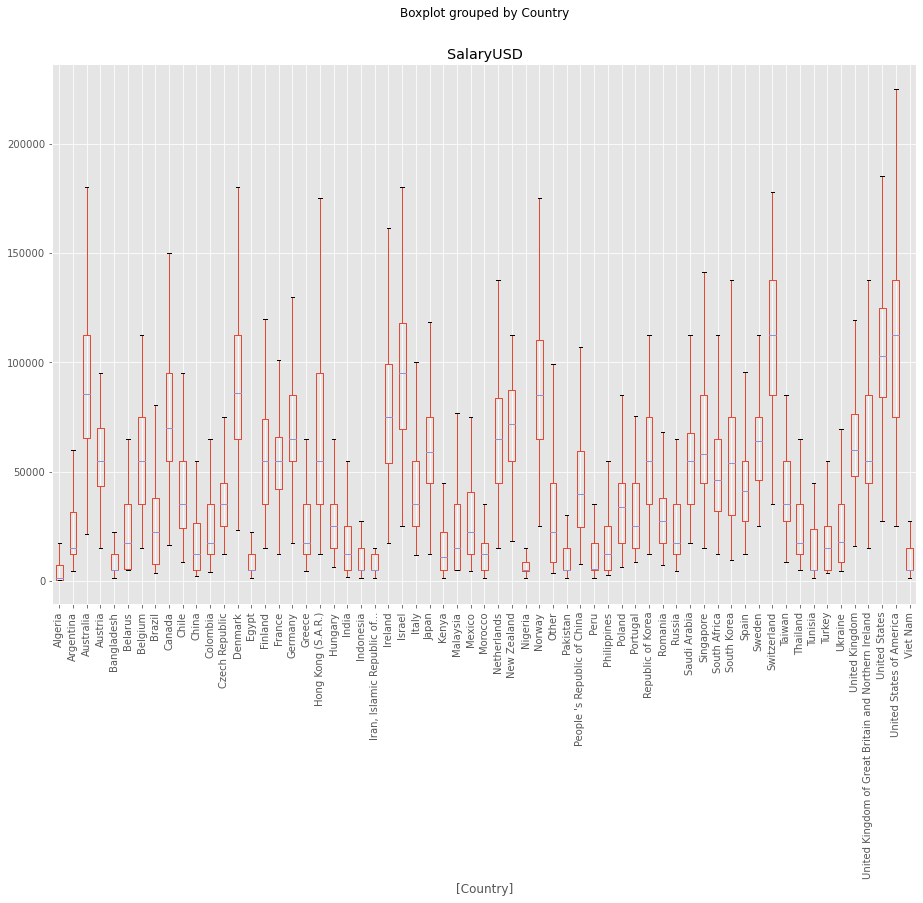

In [153]:
flierprops = dict(marker='o', markerfacecolor='steelblue', markersize=2,
                  linestyle='none')
df_income_filtered.boxplot(column=["SalaryUSD"], by=["Country"], rot=90, figsize=(15,10), flierprops=flierprops, showfliers=False)

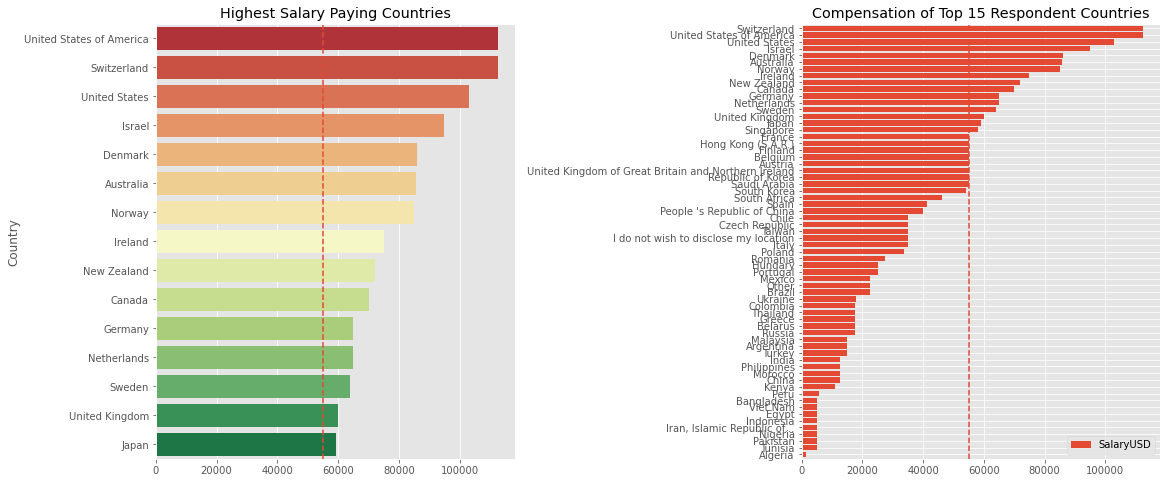

In [148]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=df_income_filtered.groupby('Country')['SalaryUSD'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('SalaryUSD',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(df_income_filtered['SalaryUSD'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=df_income_filtered.groupby('Country')['SalaryUSD'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_counts.index)]
max_coun.sort_values(by='SalaryUSD',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(df_income_filtered['SalaryUSD'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

### 1.2.0 subtract tax rate 

The OECD makes tax wedge numbers available for a few fixed household income situations.
The most appropriate seemed the category of "single person at 167% of average wage".
This is the most expensive category in all cases, so gives the most conservative result.

The data was not available by api or scrapable.
For OECD countries, the most recent numbers are from 2019.
For other countries, they are from 2010-2013 as there was only a dated document available.
+ http://compareyourcountry.org/taxing-wages/en/0/715/default/2019
+ https://read.oecd-ilibrary.org/taxation/taxi

In [154]:
df_tax = pd.read_excel('tax_wedge.xlsx', header = 0)
df_tax

,country,tax wedge 167% AW
0,Australia,34.4
1,Austria,51.0
2,Belgium,58.7
3,Canada,31.8
4,Chile,8.3
...,...,...
36,Colombia,30.2
37,China,38.3
38,India,26.1
39,Indonesia,8.2


In [155]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            41 non-null     object 
 1   tax wedge 167% AW  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


TODO: Check dtypes!

## Part 2 : Retrieving Data from Numbeo

### Numbeo.com API exploration kit

This section allows for easy exploration of the Numbeo.com API using view, store and load-to-memory functions.

All calls can be found under the [Numbeo.com API documentation][1] along with their respective descriptions.
    
Our API key is valid until 27/03/2021.

[1]: https://www.numbeo.com/api/doc.jsp "Numbeo.com API Documentation"

__IMPORTANT:__ Please run the below command in your terminal to allow ipynb to use large data streams.

`jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10`

In [149]:
countries = df_income_filtered['Country'].unique()
print(countries)

['United States' 'Australia' 'Russia' 'Taiwan' 'Colombia' 'Germany'
 'Poland' 'United Kingdom' 'Sweden' 'Portugal' 'Mexico' 'India' 'France'
 'Spain' 'Hungary' 'Brazil' 'Other' 'Canada' 'New Zealand' 'Netherlands'
 'Belarus' 'Czech Republic' 'South Africa' 'South Korea' 'Italy' 'Ukraine'
 'Ireland' "People 's Republic of China" 'Japan' 'Malaysia' 'Switzerland'
 'Argentina' 'Indonesia' 'Philippines' 'Singapore' 'Pakistan' 'Nigeria'
 'Turkey' 'Norway' 'Israel' 'Finland' 'Greece' 'Belgium' 'Denmark' 'Egypt'
 'Kenya' 'Romania' 'Chile' 'United States of America'
 'Iran, Islamic Republic of...'
 'United Kingdom of Great Britain and Northern Ireland'
 'I do not wish to disclose my location' 'China' 'Hong Kong (S.A.R.)'
 'Thailand' 'Morocco' 'Tunisia' 'Bangladesh' 'Austria' 'Viet Nam' 'Peru'
 'Republic of Korea' 'Algeria' 'Saudi Arabia']


In [15]:
import urllib, json

prefix = "https://www.numbeo.com/api/"
key = "?api_key=5xu0b257se2ui6"


countryPre = '&country='

def print_api_response() :
    method = input('You are about to VIEW data in JSON format.\nEnter your API method:\n')
    url = prefix + method + key 
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    indented_data = json.dumps(data, indent=4)
    print(indented_data)  

def print_api_responseCountry() :
    method = input('You are about to VIEW data in JSON format.\nEnter your API method:\n')
    country= input('You are about to VIEW data in JSON format.\nEnter Country:\n')
    url = prefix + method + key + countryPre + country
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    indented_data = json.dumps(data, indent=4)
    print(indented_data)  
   
    
    
def store_api_response() :
    method = input('You are about to STORE data in JSON format.\nEnter your API method:\n')
    filename = input('Please enter a filename to store the JSON data under:\n')
    url = prefix + method + key + countryPre
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    indented_data = json.dumps(data, indent=4)
    with open(filename + ".json", "w") as write_file: 
        json.dump(data, write_file, indent=4)
    print('\nWrite completed. Check your workingdir.')

    
def open_stored_response() : 
    filename = input('Please enter a filename to open:\n')
    with open(filename + '.json') as f:   
        data = json.load(f)
        return json.dumps(data, indent=4)

1. __print_api_response()__ to view the incoming server response in indented JSON format.
2. __store_api_response()__ to write the incoming server response to a custom filename.json within your workingdir.
3. __variable_name = open_stored_response()__ to open a saved filename.json and store the data to 'variable_name'.

In [16]:
print_api_responseCountry()

You are about to VIEW data in JSON format.
Enter your API method:
country_indices
You are about to VIEW data in JSON format.
Enter Country:
Germany
{
    "crime_index": 35.48197039390262,
    "traffic_time_index": 31.357952973720607,
    "cpi_and_rent_index": 50.46141511290511,
    "purchasing_power_incl_rent_index": 92.69967503207135,
    "restaurant_price_index": 64.23652954949489,
    "property_price_to_income_ratio": 9.019028717387823,
    "contributors_cost_of_living": 4018,
    "contributors_healthcare": 759,
    "climate_index": 82.72659761450095,
    "safety_index": 64.5180296060974,
    "traffic_co2_index": 2415.9308437067775,
    "cpi_index": 68.64419379996558,
    "traffic_inefficiency_index": 128.84181303740752,
    "contributors_traffic": 759,
    "quality_of_life_index": 176.38306560053294,
    "rent_index": 29.582666983338434,
    "contributors_pollution": 1397,
    "health_care_index": 73.76993150445142,
    "contributors_crime": 2686,
    "traffic_index": 105.425177219